# Week 5: Beyond Bag-of-Words

POP77142 Quantitative Text Analysis for Social Scientists

Tom Paskhalis

## Overview

-   Distributional hypothesis
-   Keyword in context (KWIC)
-   Word representations
-   Embeddings

# Words

## Word Meanings

-   In order to analyse text, it is helpful to understand the meanings
    of words.
-   Even better if we could somehow ‘explain’ (represent) these meanings
    in a way that a computer can understand.
-   Possible ways to represent word meanings:
    -   Columns in document-term matrices;
    -   Dictionary definitions;
    -   Synonyms;
    -   Similar words;
    -   …

## Back to DTM

-   Here is a DTM showing the occurrences of $4$ words in $4$ plays by
    Shakespeare.

|                    | **battle** | **good** | **fool** | **wit** |
|--------------------|------------|----------|----------|---------|
| **As You Like It** | 1          | 114      | 36       | 20      |
| **Twelfth Night**  | 0          | 80       | 58       | 15      |
| **Julius Caesar**  | 7          | 62       | 1        | 2       |
| **Henry V**        | 13         | 89       | 4        | 3       |

. . .

In [ ]:
dtm <- matrix(c(
  1, 114, 36, 20,
  0,  80, 58, 15,
  7,  62,  1,  2,
  13, 89,  4,  3
), nrow = 4, byrow = TRUE)
rownames(dtm) <- c("As You Like It", "Twelfth Night", "Julius Caesar", "Henry V")
colnames(dtm) <- c("battle", "good", "fool", "wit")

. . .

In [ ]:
dtm

               battle good fool wit
As You Like It      1  114   36  20
Twelfth Night       0   80   58  15
Julius Caesar       7   62    1   2
Henry V            13   89    4   3

## Document Vectors

-   It is easy to visualise documents/words in a limited number of
    dimensions.
-   Here is a spatial visualisation of the the four Shakespeare plays in
    $2$-dimensions, corresponding to the words *battle* and *fool*.

. . .

### Plot

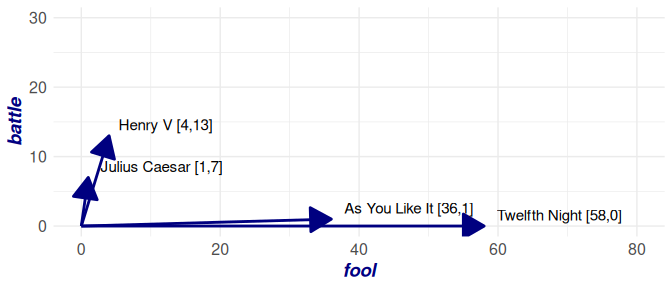

### Code

``` r
library("ggplot2")

dtm |>
  (\(dtm) data.frame(
    docs = rownames(dtm),
    x = dtm[,"fool"],
    y = dtm[,"battle"]
  ))() |>
  ggplot(aes(x = 0, y = 0)) +
  geom_segment(aes(xend = x, yend = y),
               arrow = arrow(type = "closed", length = unit(0.25, "inches")),
               color = "navy", linewidth = 1) +
  geom_text(aes(x = x, y = y,
                label = paste0(docs, " [", x, ",", y, "]")),
            hjust = -0.1, vjust = -0.5, size = 4) +
  labs(x = "fool", y = "battle") +
  theme_minimal() +
  theme(
    axis.title = element_text(face = "bold.italic", color = "navy", size = 14),
    axis.text = element_text(size = 12)
  ) +
  xlim(0, 80) +
  ylim(0, 30)
```

. . .

-   The comedies have high values for the *fool* dimension and low
    values for the *battle* dimension.

## Term-Document Matrix (TDM)

-   An equivalent representation of texts as *document-term matrices*
    (DTMs), could be made with *term-document matrices* (TDMs).

. . .

|  | **As You Like It** | **Twelfth Night** | **Julius Caesar** | **Henry V** |
|-------------|-----------------|-----------------|-----------------|-----------|
| **battle** | 1 | 0 | 7 | 13 |
| **good** | 114 | 80 | 62 | 89 |
| **fool** | 36 | 58 | 1 | 4 |
| **wit** | 20 | 15 | 2 | 3 |

. . .

-   In effect, the TDM is just the transpose of the DTM.

In [ ]:
tdm <- t(dtm)

. . .

In [ ]:
tdm

       As You Like It Twelfth Night Julius Caesar Henry V
battle              1             0             7      13
good              114            80            62      89
fool               36            58             1       4
wit                20            15             2       3

## Word Vectors

Similar to document vectors, we can also represent words as vectors.

. . .

### Plot

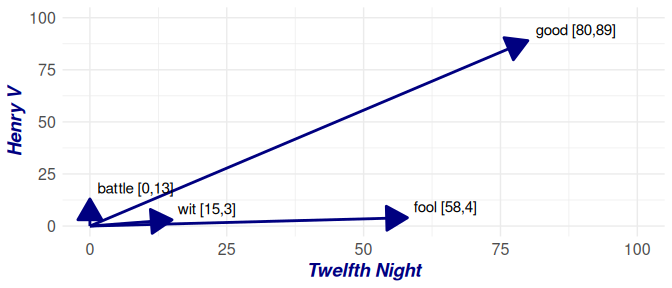

### Code

``` r
library("ggplot2")

tdm |>
  (\(tdm) data.frame(
    words = rownames(tdm),
    x = tdm[,"Twelfth Night"],
    y = tdm[,"Henry V"]
  ))() |>
  ggplot(aes(x = 0, y = 0)) +
  geom_segment(aes(xend = x, yend = y),
               arrow = arrow(type = "closed", length = unit(0.25, "inches")),
               color = "navy", linewidth = 1) +
  geom_text(aes(x = x, y = y,
                label = paste0(words, " [", x, ",", y, "]")),
            hjust = -0.1, vjust = -0.5, size = 4) +
  labs(x = "Twelfth Night", y = "Henry V") +
  theme_minimal() +
  theme(
    axis.title = element_text(face = "bold.italic", color = "navy", size = 14),
    axis.text = element_text(size = 12)
  ) +
  xlim(0, 100) +
  ylim(0, 100)
```

. . .

-   Naturally, a $2$-dimensional representation is rather limiting.

# Distributional Hypothesis

## Distributional Hypothesis

> You shall know a word by the company it keeps.
>
> J.R. Firth, 1957

. . .

-   Words that occur in similar contexts tend to have similar meanings.
-   Think about language acquisition in humans.
-   Children don’t learn languages (word meanings) by studying
    dictionaries.
-   They learn them by hearing and reading them in context.

## Keyword in Context (KWIC)

-   An intuitive first step would be to look at *contexts* of a word.
-   One way, Keyword in Context (KWIC) approach from corpus linguistics.
-   The idea is to pick a word and some window ($\pm n$ words) around
    it.

. . .

In [ ]:
dail_33 <- read.csv("../data/dail_33_small.csv.gz")

. . .

In [ ]:
dail_33_toks <- dail_33$text |>
  quanteda::tokens(remove_punct = TRUE) |>
  quanteda::tokens_tolower() |>
  quanteda::tokens_remove(quanteda::stopwords("en"))

. . .

In [ ]:
kwic_taoiseach <- quanteda::kwic(dail_33_toks, pattern = "taoiseach", window = 2)

. . .

In [ ]:
head(kwic_taoiseach, 10)

Keyword-in-context with 10 matches.                                                                       
 [text28, 370] enacted apparently | taoiseach | tánaiste’s office      
 [text32, 249] ireland background | taoiseach | asked attorney         
 [text77, 477]         months ago | taoiseach | said build             
  [text84, 57]     indeed elected | taoiseach | venue strange          
  [text84, 81]   teams department | taoiseach | office tánaiste        
 [text188, 25]      asking wanted | taoiseach | answer simple          
 [text219, 77]     going election | taoiseach | call election          
  [text273, 5]  minister tánaiste | taoiseach | minister state         
 [text344, 10] expenditure reform | taoiseach | pursuant standing      
  [text512, 7] expenditure reform | taoiseach | completed consideration

## Keyword in Context (KWIC)

. . .

In [ ]:
vec_taoiseach <- c(
  # Contexts are stored as n-grams (bigrams for 2-word contexts)
  unlist(strsplit(kwic_taoiseach$pre, split = " ")),
  unlist(strsplit(kwic_taoiseach$post, split = " "))
) |>
  table() |>
  prop.table() |>
  sort(decreasing = TRUE)

. . .

In [ ]:
head(vec_taoiseach, 20)


   minister         ask        said  department  government    tánaiste 
0.016495321 0.014144115 0.013157531 0.012263151 0.011774469 0.009211194 
     deputy         can       thank        time       issue      raised 
0.008492001 0.008270711 0.007505417 0.007265686 0.005320179 0.005320179 
       know       asked    question          us         now        last 
0.005117330 0.004932921 0.004564105 0.004564105 0.004536444 0.004416578 
       give       aware 
0.004269052 0.004259831 

. . .

Could we have guessed the word from the provided context?

# Word Representations

## Word Vectors

-   Vectors for representing words are called **embeddings**.
-   It is more often used to refer to *dense vectors*.
-   But *sparse vectors* are also embeddings.
-   What is the problem with sparse vectors?

. . .

In [ ]:
length(vec_taoiseach)

[1] 9537

. . .

In [ ]:
median(vec_taoiseach)

[1] 1.844083e-05

In practice, it would be even larger (as we excluded all zero counts),
of length $V$ (vocabulary size).

## Co-occurrence Matrix

-   Instead of using TDM, we could represent words as a **co-occurrence
    matrix**.
-   It is also knows as **term-term matrix**, **word-word matrix**, or
    **term-context matrix**.
-   The idea is to count how many times a word occurs in the context of
    another word.
-   The matrix would, thus, has a dimensionality of $V \times V$.
-   Context can be defined in many ways:
    -   Same document,
    -   Same sentence,
    -   An arbitrary window of $\pm n$ words.

## Example: Co-occurrence Matrix

In [ ]:
dail_33_fcm <- dail_33_toks |>
  # Create feature co-occurrence matrix (fcm)
  quanteda::fcm(
    window = 2,
    context = "window",
    count = "frequency",
    tri = FALSE
  )

. . .

In [ ]:
dail_33_fcm

Feature co-occurrence matrix of: 157,414 by 157,414 features.
                features
features         seanad éireann accepted finance bill 2024 without
  seanad             58     565       19       7  530   33      29
  éireann           565     184        5      16   50    6       5
  accepted           19       5       98      20   69    1      16
  finance             7      16       20     176 1134   27      28
  bill              530      50       69    1134 2056  535     340
  2024               33       6        1      27  535   78      47
  without            29       5       16      28  340   47     274
  recommendation      5       4      101      12   36   15      16
  wish                7       5        7      17  141    7      12
  advise              1       8        0       4   12    0       1
                features
features         recommendation wish advise
  seanad                      5    7      1
  éireann                     4    5      8
  accepted         

## Example: Co-occurrence Matrix

-   Let’s zoom in on some words that we saw frequently in the context of
    *taoiseach*.

. . .

In [ ]:
taoiseach_fcm <- dail_33_fcm |>
  quanteda::fcm_select(
    pattern = c("taoiseach", "tánaiste", "minister", "party", "election", "government"),
    selection = "keep"
  )

. . .

In [ ]:
taoiseach_fcm

Feature co-occurrence matrix of: 6 by 6 features.
            features
features     minister government tánaiste taoiseach party election
  minister       7792       4988     1204      1789   670       85
  government     4988       4896      517      1277  1185      168
  tánaiste       1204        517       68       999    81        9
  taoiseach      1789       1277      999       308   131       67
  party           670       1185       81       131   700       60
  election         85        168        9        67    60      154

## Weighting Terms

-   Oftentimes raw frequencies are difficult to interpret.
-   Words that occur frequently in text (e.g. stopwords) are not very
    informative.
-   There is a paradox in that words that occur in the context of
    another word likely carry as little information as the words that
    occur *too* frequently.
-   How do we address this?
    -   For DTM/TDM, we can use **tf-idf** (term frequency-inverse
        document frequency) weighting.
    -   For co-occurrence matrices, we can use **pointwise mutual
        information** (PMI).

## Pointwise Mutual Information (PMI)

-   The intuition behind PMI is that the best way to weight the
    association between two words is to compare the observed
    co-occurrence with the expected co-occurrence.
-   In probability terms it is how often two events ($w$ - word and
    $c$ - context) co-occur compared to how often we would expect them
    to if they were independent:

$$
PMI(w, c) = \log_2 \frac{P(w, c)}{P(w) P(c)}
$$

-   This ratio gives us an estimate of how much the two words co-occur
    than we would expect them by chance.

## Example: PMI

-   Let’s try to work out some PMI values for the co-occurrence matrix
    we created above.
-   To simplify our calculations, let’s say these are the only words in
    our vocabulary.

. . .

In [ ]:
taoiseach_fcm

Feature co-occurrence matrix of: 6 by 6 features.
            features
features     minister government tánaiste taoiseach party election
  minister       7792       4988     1204      1789   670       85
  government     4988       4896      517      1277  1185      168
  tánaiste       1204        517       68       999    81        9
  taoiseach      1789       1277      999       308   131       67
  party           670       1185       81       131   700       60
  election         85        168        9        67    60      154

. . .

-   First, let’s calculate the margins:

In [ ]:
# Row (word) margins
w <- rowSums(as.matrix(taoiseach_fcm))

In [ ]:
# Column (context) margins
c <- colSums(as.matrix(taoiseach_fcm))

In [ ]:
# Column (context) margins
total <- sum(w)

## Example: PMI

In [ ]:
w

  minister government   tánaiste  taoiseach      party   election 
     16528      13031       2878       4571       2827        543 

In [ ]:
c

  minister government   tánaiste  taoiseach      party   election 
     16528      13031       2878       4571       2827        543 

In [ ]:
total

[1] 40378

$$
P(w = taoiseach, c = party) = \frac{131}{40378} = 0.0032
$$

. . .

$$
P(w = taoiseach) = \frac{4571}{40378} = 0.1132
$$

. . .

$$
P(c = party) = \frac{2827}{40378} = 0.07
$$

. . .

$$
PPMI(w = taoiseach, c = party) = \log_2 \frac{0.0032}{0.1132 \times 0.07} = -1.31
$$

# Embeddings

## Word Embeddings

-   The problem with all word vectors (embeddings) calculated so far is
    that they are high-dimensional.
-   In the extreme they are of dimension $V$ (vocabulary size).
-   This has a number of disadvantages:
    -   Difficulty of interpretation.
    -   Computationally inefficient.
-   What we would like to have instead are word embeddings of some
    dimensionality $K$ such that $K \lt V$.
-   But which would retain the useful properties that we discussed
    (convey the word meanings).

## Development of Word Embeddings

-   Learning vector representations of words has long been an active
    area of research in NLP (e.g. [Bengio et
    al. (2003)](https://dl.acm.org/doi/10.5555/944919.944966))
-   However, the field really took off after the introduction of
    **Word2Vec** by [Mikolov et
    al. (2013)](https://arxiv.org/abs/1301.3781).
-   Other populat implemenations include **GloVe** (Global Vectors for
    Word Representation) by [Pennington et
    al. (2014)](https://nlp.stanford.edu/projects/glove/)
-   There can be a trade-off between general-purpose embeddings trained
    on large corpora (e.g. Wikipedia) and domain-specific embeddings
    trained on smaller corpora.
-   However, pretrained embeddings have been shown to be quite robust
    and reliable for some political science tasks (e.g. [Rodriguez &
    Spirling, 2022](https://doi.org/10.1086/715162)).

## Overview

<figure>
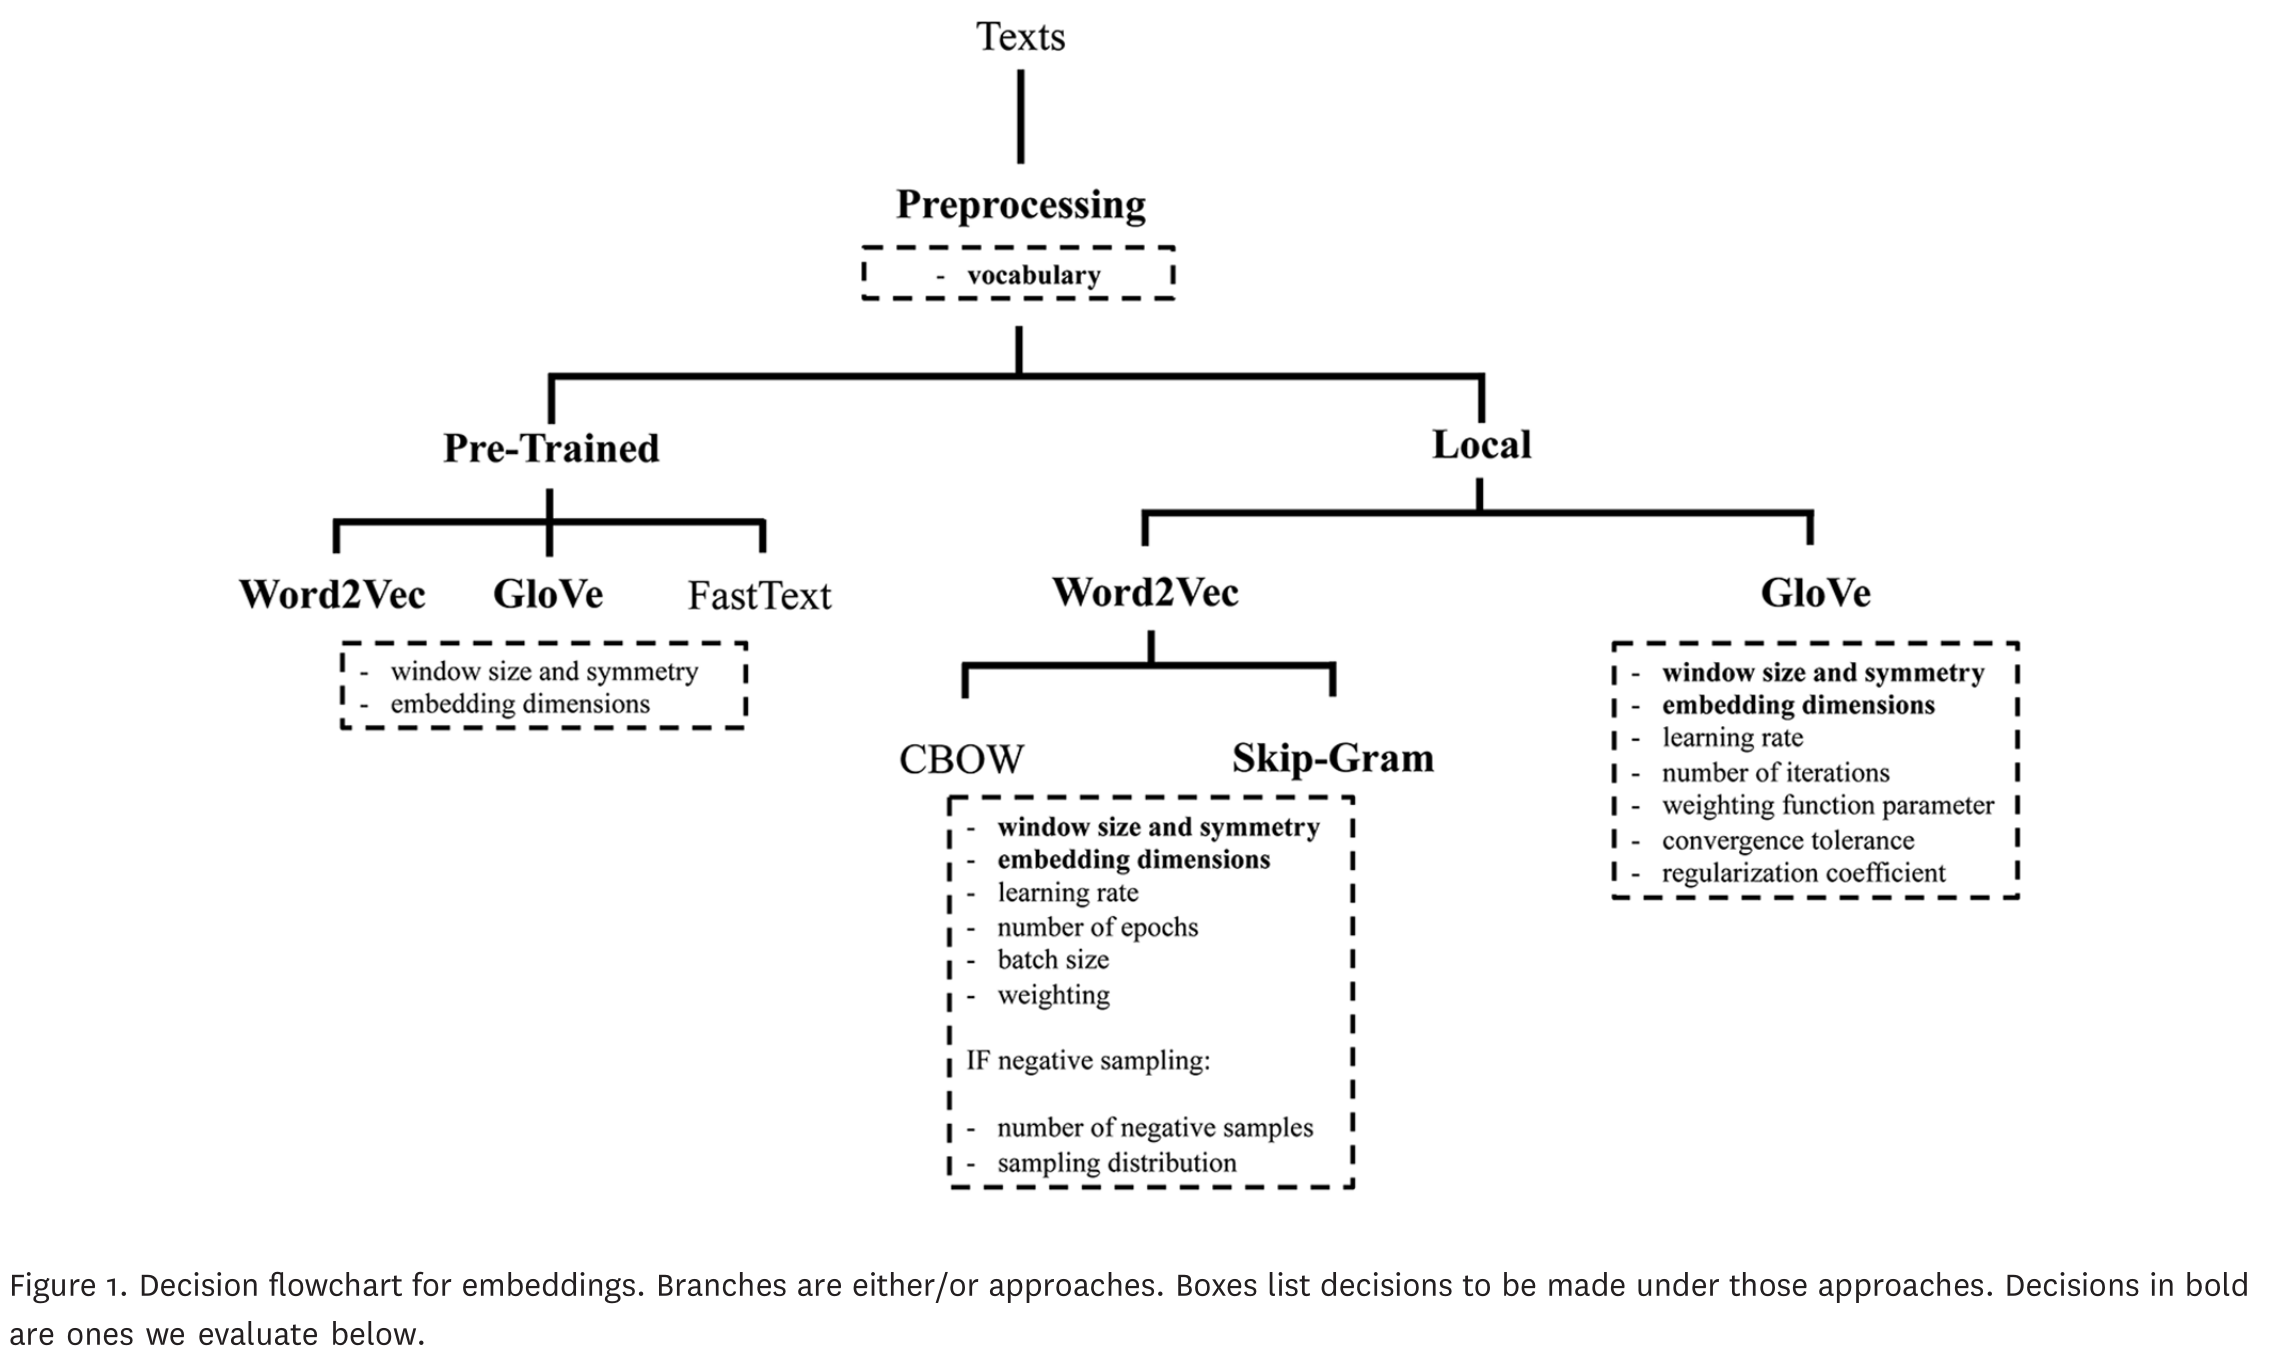
<figcaption aria-hidden="true"><a
href="https://doi.org/10.1086/715162">(Rodriguez &amp; Spirling,
2022)</a></figcaption>
</figure>

## Example: GloVe

-   GloVe is an unsupervised learning algorithm for obtaining vector
    representations for words.
-   We can use `text2vec` package to fit a GloVe model to our
    co-occurrence matrix.

. . .

In [ ]:
library("text2vec")

. . .

In [ ]:
# Fit GloVe model
glove <- text2vec::GloVe$new(
  rank = 50,
  x_max = 10
)
wv <- glove$fit_transform(
  x = dail_33_fcm,
  n_iter = 10,
  convergence_tol = 0.01,
  n_threads = 8
)

INFO  [10:15:01.129] epoch 1, loss 0.1112
INFO  [10:15:03.284] epoch 2, loss 0.0858
INFO  [10:15:05.409] epoch 3, loss 0.0759
INFO  [10:15:07.522] epoch 4, loss 0.0712
INFO  [10:15:09.644] epoch 5, loss 0.0683
INFO  [10:15:11.758] epoch 6, loss 0.0663
INFO  [10:15:13.869] epoch 7, loss 0.0648
INFO  [10:15:16.003] epoch 8, loss 0.0637
INFO  [10:15:18.135] epoch 9, loss 0.0628
INFO  [10:15:20.557] epoch 10, loss 0.0621

## Example: GloVe

-   Let’s examine some of the resultant word vectors.

. . .

In [ ]:
wv_context <- glove$components
dim(wv_context)

[1]     50 157414

. . .

In [ ]:
word_vectors <- wv + t(wv_context)

. . .

In [ ]:
head(word_vectors["taoiseach",])

[1] -0.92150257 -0.01652923 -1.35727773 -0.10452898 -0.93159380 -1.83383891

. . .

In [ ]:
head(word_vectors["tánaiste",])

[1] -0.6101540  0.1389947 -1.0097375 -0.1858410 -1.0971014 -1.5888456

## Example: GloVe

-   Let’s calculate cosine similarity between some word vectors.

In [ ]:
cos_sim <- function(vec_a, vec_b) {
  sum(vec_a * vec_b) / (sqrt(sum(vec_a^2)) * sqrt(sum(vec_b^2)))
}

. . .

In [ ]:
sim_taoiseach_tanaiste <- cos_sim(
  word_vectors["taoiseach",],
  word_vectors["tánaiste",]
)
sim_taoiseach_tanaiste

[1] 0.958002

. . .

In [ ]:
sim_taoiseach_minister <- cos_sim(
  word_vectors["taoiseach",],
  word_vectors["minister",]
)
sim_taoiseach_minister

[1] 0.9084156

## Next

-   Tutorial: Word embeddings
-   Final Project: Due 23:59 on Wednesday, 23rd April (submission on
    Blackboard)